<h1><center>ADS Assignment 9</center></h1>

The assignment focuses on what you have learned in the Unsupervised Machine
Learning notes. Use the following link to source your data for the exercise on Sales Conversion
Optimization: https://www.kaggle.com/loveall/clicks-conversion-tracking.

***

### 1. Import the libraries and load the data.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme
%matplotlib inline

In [2]:
df = pd.read_csv('KAG_conversion_data.csv')

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

### 2. Dummy encode any categorical or object values in the data and save the resulting data frame to variable X.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
X = pd.get_dummies(df)

In [7]:
X.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.43,2,1,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.82,2,0,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.00,1,0,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.25,1,0,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.29,1,1,1,0,0,0,0,1


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   interest             1143 non-null   int64  
 4   Impressions          1143 non-null   int64  
 5   Clicks               1143 non-null   int64  
 6   Spent                1143 non-null   float64
 7   Total_Conversion     1143 non-null   int64  
 8   Approved_Conversion  1143 non-null   int64  
 9   age_30-34            1143 non-null   uint8  
 10  age_35-39            1143 non-null   uint8  
 11  age_40-44            1143 non-null   uint8  
 12  age_45-49            1143 non-null   uint8  
 13  gender_F             1143 non-null   uint8  
 14  gender_M             1143 non-null   uint8  
dtypes: float64(1), int64(8), uint8(6)
memo

### 3. Using a heat map to show the correlation in the data:
    a. Drop the first 4 columns in the data frame X.
    b. Basing your answer on what can be seen in the heat map, why did we drop these columns?

In [9]:
X.corr()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
ad_id,1.000000,0.929892,0.972002,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331,-0.115297,0.045434,0.063397,0.029789,-0.058324,0.058324
xyz_campaign_id,0.929892,1.000000,0.872392,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968,-0.117677,0.048032,0.065182,0.028329,-0.086118,0.086118
fb_campaign_id,0.972002,0.872392,1.000000,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658,-0.124770,0.041082,0.075093,0.034196,-0.038037,0.038037
interest,0.456483,0.272282,0.595753,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353,-0.055644,0.021583,0.029271,0.015942,0.047230,-0.047230
Impressions,0.462308,0.495273,0.439439,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249,-0.066877,-0.028549,0.002822,0.102743,0.067059,-0.067059
Clicks,0.431981,0.469729,0.406978,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526,-0.150856,-0.044296,0.028765,0.191246,0.168725,-0.168725
Spent,0.433053,0.476689,0.403532,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178,-0.138037,-0.039705,0.020909,0.179187,0.125022,-0.125022
Total_Conversion,0.346539,0.346684,0.344170,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034,0.086600,-0.038931,-0.038657,-0.025933,0.027559,-0.027559
Approved_Conversion,0.271331,0.284968,0.257658,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000,0.095685,-0.033133,-0.036732,-0.043914,-0.025350,0.025350
age_30-34,-0.115297,-0.117677,-0.124770,-0.055644,-0.066877,-0.150856,-0.138037,0.086600,0.095685,1.000000,-0.405751,-0.365691,-0.417224,-0.030271,0.030271


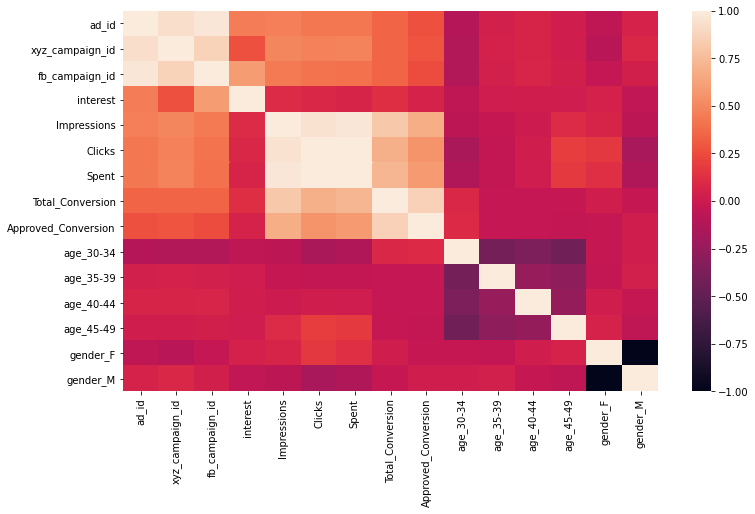

In [10]:
plt.subplots(figsize=(12, 7))
sns.heatmap(X.corr())

In [11]:
X.drop(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'interest'], axis =1).corr()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
Impressions,1.000000,0.948514,0.970386,0.812838,0.684249,-0.066877,-0.028549,0.002822,0.102743,0.067059,-0.067059
Clicks,0.948514,1.000000,0.992906,0.694632,0.559526,-0.150856,-0.044296,0.028765,0.191246,0.168725,-0.168725
Spent,0.970386,0.992906,1.000000,0.725379,0.593178,-0.138037,-0.039705,0.020909,0.179187,0.125022,-0.125022
Total_Conversion,0.812838,0.694632,0.725379,1.000000,0.864034,0.086600,-0.038931,-0.038657,-0.025933,0.027559,-0.027559
Approved_Conversion,0.684249,0.559526,0.593178,0.864034,1.000000,0.095685,-0.033133,-0.036732,-0.043914,-0.025350,0.025350
age_30-34,-0.066877,-0.150856,-0.138037,0.086600,0.095685,1.000000,-0.405751,-0.365691,-0.417224,-0.030271,0.030271
age_35-39,-0.028549,-0.044296,-0.039705,-0.038931,-0.033133,-0.405751,1.000000,-0.249737,-0.284930,-0.044824,0.044824
age_40-44,0.002822,0.028765,0.020909,-0.038657,-0.036732,-0.365691,-0.249737,1.000000,-0.256799,0.026071,-0.026071
age_45-49,0.102743,0.191246,0.179187,-0.025933,-0.043914,-0.417224,-0.284930,-0.256799,1.000000,0.054980,-0.054980
gender_F,0.067059,0.168725,0.125022,0.027559,-0.025350,-0.030271,-0.044824,0.026071,0.054980,1.000000,-1.000000


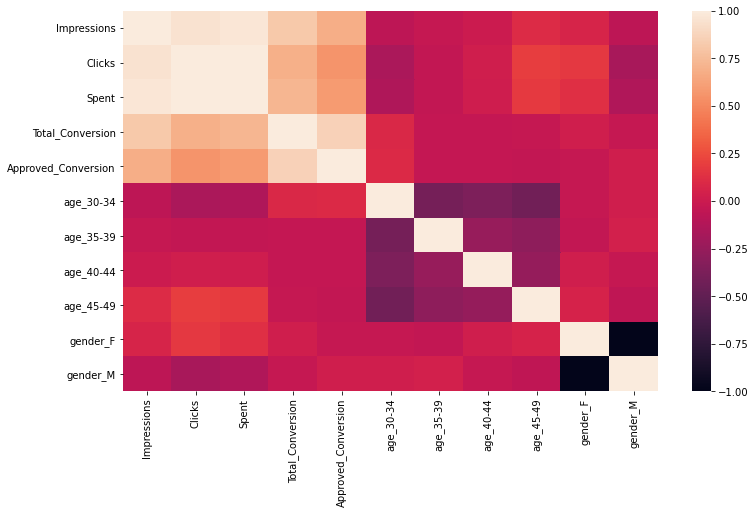

In [12]:
plt.subplots(figsize=(12, 7))
sns.heatmap(X.drop(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'interest'], axis =1).corr())

### 4. Using the elbow method:
    a. Determine the best number of clusters for the data in the range of 2 to 20.
    b. Also include the graphical plot for the elbow curve.

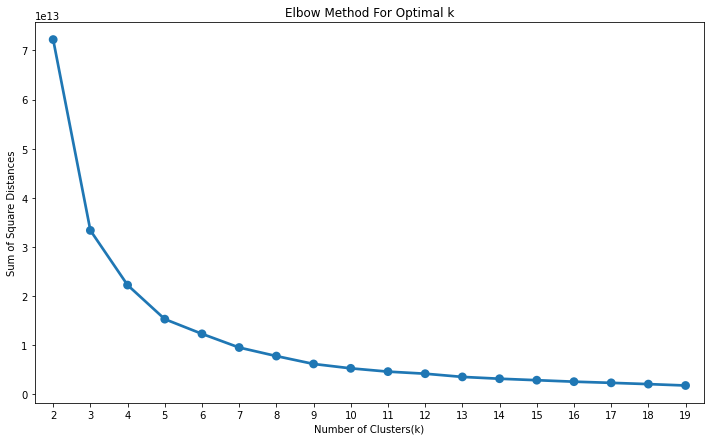

In [59]:
from sklearn.cluster import KMeans
import seaborn as sns 

sum_of_sq_dist = {}
for k in range(2,20):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.subplots(figsize=(12, 7))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

    Best number of clusters for the data in the range of 2 to 20 is 4

### 5. Based on the result above in 4b use the value at your elbow point to cluster the values in the data frame X.

In [14]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

KMeans(max_iter=1000, n_clusters=4)

In [15]:
KMean_clust.inertia_

22209301996095.832

### 6. Use the model to predict the labels from the data and save them to variable y_means.

In [16]:
#Find the clusters for the observation given in the dataset
y_means = KMean_clust.labels_
y_means

array([1, 1, 1, ..., 3, 0, 0])

### 7. Add the values in y_means to the original data frame (not X) as column ‘Advert_Type’.

In [17]:
df['Advert_Type'] = y_means

In [18]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,1
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,1
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,1
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1


### 8. Using any form of distribution plot of your choice and the original data frame, plot 2 graphs that can be used to answer the following:
    a. Which advert type lead to the highest and consistent amount of sales by customers of all the age brackets?
    b. Does the company xyz have gender bias in terms of their ad spending? Are their products gender neutral?

In [19]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'Advert_Type'],
      dtype='object')

In [20]:
df.age.unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [28]:
df.Spent.max(), df.Spent.min()

(639.9499981, 0.0)

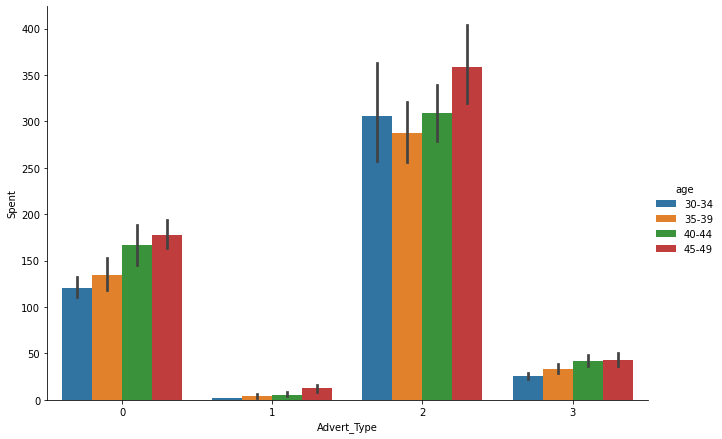

In [58]:
sns.catplot(x="Advert_Type", y="Spent", hue="age", kind="bar", data=df, height= 6, aspect=1.5);

    Advert type 2 leads to the highest and consistent amount of sales by customers of all the age brackets

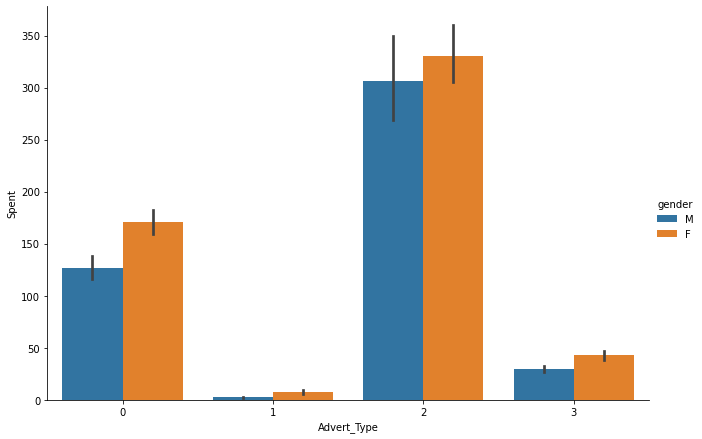

In [56]:
sns.catplot(x="Advert_Type", y="Spent", hue="gender", kind="bar", data=df, height= 6, aspect=1.5);

    Company xyz does not have gender bias in terms of their ad spending. 
    Their products gender neutral

***

<h4><center>The End</center></h4>